In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/train (3).csv")  # change to your file path


In [2]:
# Show first few rows
print(df.head())

# Basic info
print(df.info())

# Missing values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 38.38%


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


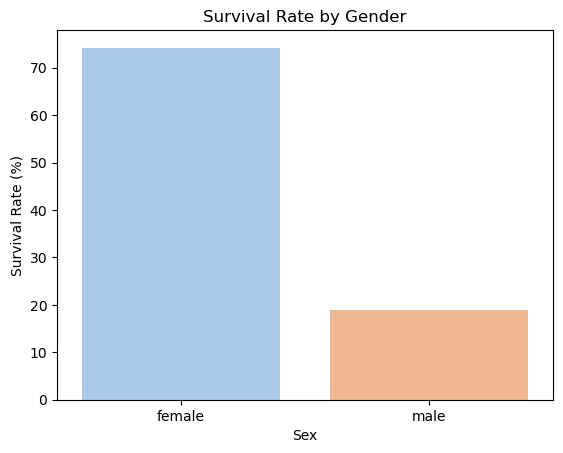

In [4]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)

sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.show()


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


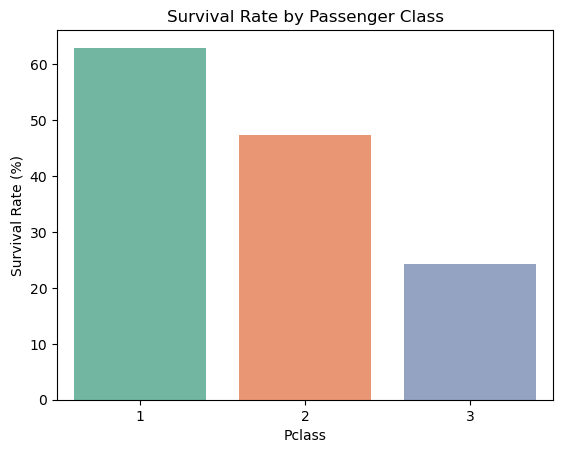

In [5]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Pclass')
plt.show()


AgeGroup
Child         57.971014
Teen          42.857143
Adult         38.823529
Middle Age    39.062500
Senior        22.727273
Name: Survived, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_12668\1757733943.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


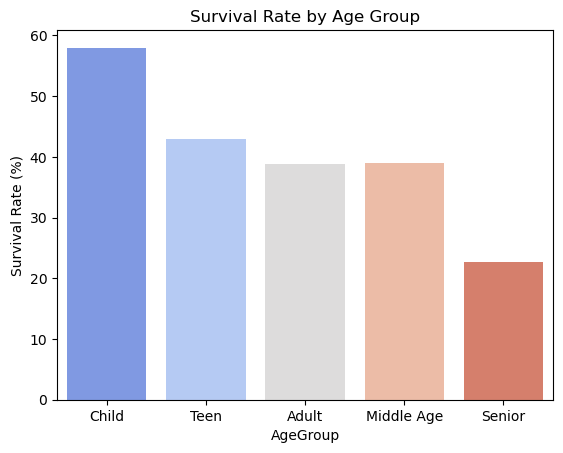

In [6]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 80], 
                        labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
print(survival_by_age)

sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette='coolwarm')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()


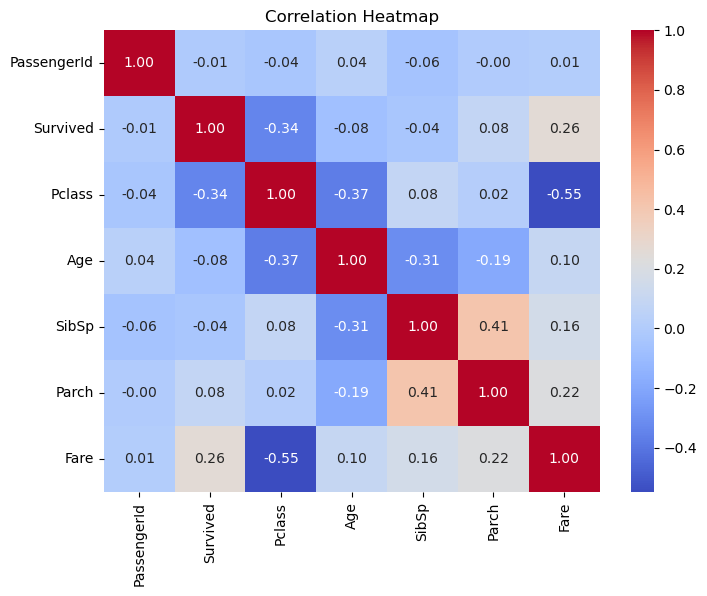

In [9]:
# 5. Correlation heatmap (numeric features only)
plt.figure(figsize=(8, 6))
correlation = df.corr(numeric_only=True)  # numeric_only to avoid warnings
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# 3. Correlation with target in descending order
correlation_target = df.corr(numeric_only=True)["Survived"].sort_values(ascending=False)
print("\nCorrelation with Survived (Descending):\n", correlation_target)



Correlation with Survived (Descending):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


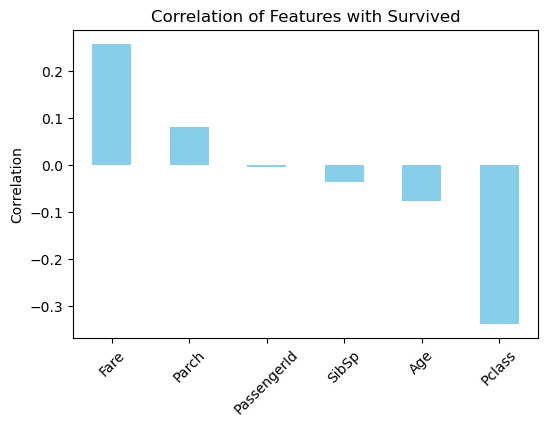

In [12]:
# Plot correlation with target
plt.figure(figsize=(6, 4))
correlation_target.drop("Survived").plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Survived")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

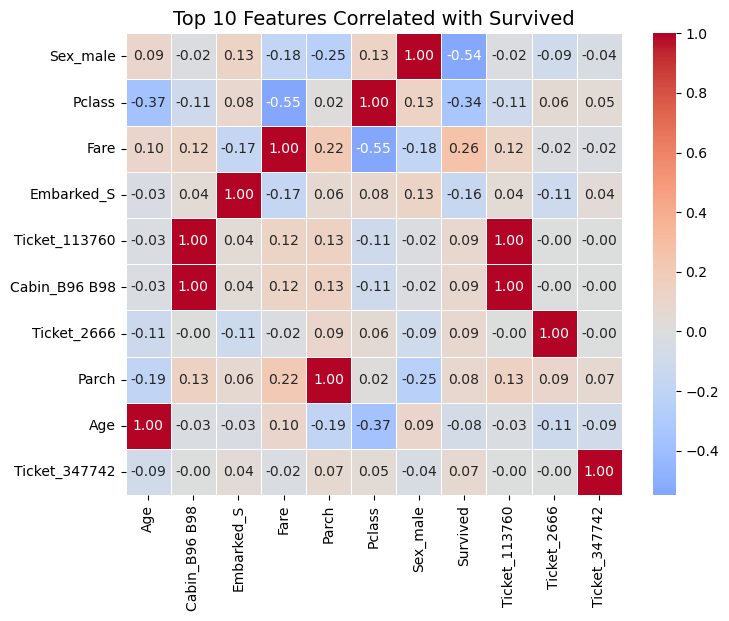


Top 10 Features correlated with Survived:
 Sex_male         0.543351
Pclass           0.338481
Fare             0.257307
Embarked_S       0.155660
Ticket_113760    0.085083
Cabin_B96 B98    0.085083
Ticket_2666      0.085083
Parch            0.081629
Age              0.077221
Ticket_347742    0.073642
Name: Survived, dtype: float64


In [16]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
corr_matrix = df_encoded.corr()

# Top 10 correlations with Survived (excluding itself)
top_10_features = corr_matrix["Survived"].abs().sort_values(ascending=False)[1:11].index

# Filter correlation matrix for top features + target
top_corr_matrix = corr_matrix.loc[top_10_features, top_10_features.union(["Survived"])]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Top 10 Features Correlated with Survived", fontsize=14)
plt.show()

# Print ranking
print("\nTop 10 Features correlated with Survived:\n", 
      corr_matrix["Survived"].abs().sort_values(ascending=False)[1:11])
